In [ ]:
# # Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# # Restart your kernel after installing 
# !pip install joblib

In [ ]:
# !pip install xgboost

In [ ]:
# pip install pyforest

In [8]:
# Import the dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore', FutureWarning)
pd.set_option('mode.chained_assignment', None)

In [9]:
# Import the dependencies
from sklearn.metrics import plot_confusion_matrix

In [10]:
# import csv into a dataframe
data_read = pd.read_csv("../Resources/fraudTrain.csv")
print(data_read.columns)
data_read.head()

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [12]:
data_sample = data_read[:5000]

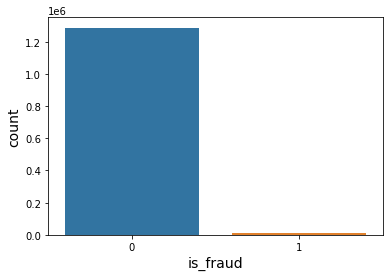

In [13]:
import seaborn as sns
# read a titanic.csv file
# from seaborn libraray
# df = sns.load_dataset(data_read)

df = data_read.groupby('is_fraud')['trans_num'].count().reset_index(name='count')
df

xaxis = df['is_fraud']
yaxis = df['count']

plt.xlabel("is fraud", fontsize=14)
plt.ylabel('count', fontsize=14)

 # who v/s fare barplot 
sns.barplot(x = xaxis, y = yaxis, data = df)

# plt.bar(xaxis, yaxis)

# Show the plot
plt.show()

In [ ]:
# isolation forest algorithm

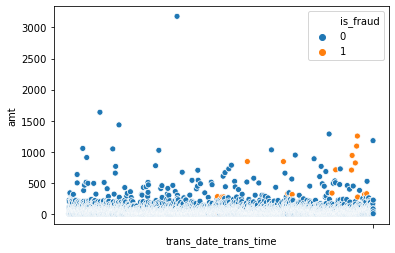

In [25]:
#I read the csv churn data into variable called df. Here I would only use two continuous features CreditScore and Age with the target Exited
# df_example = df[['CreditScore', 'Age', 'Exited']]
sns.scatterplot(data = data_sample, x ='trans_date_trans_time', y = 'amt', hue = 'is_fraud')
plt.xticks("")
plt.show()

In [ ]:
sns.scatterplot(data = data_read, x ='trans_date_trans_time', y = 'amt', hue = 'is_fraud')
plt.xticks("")
plt.show()

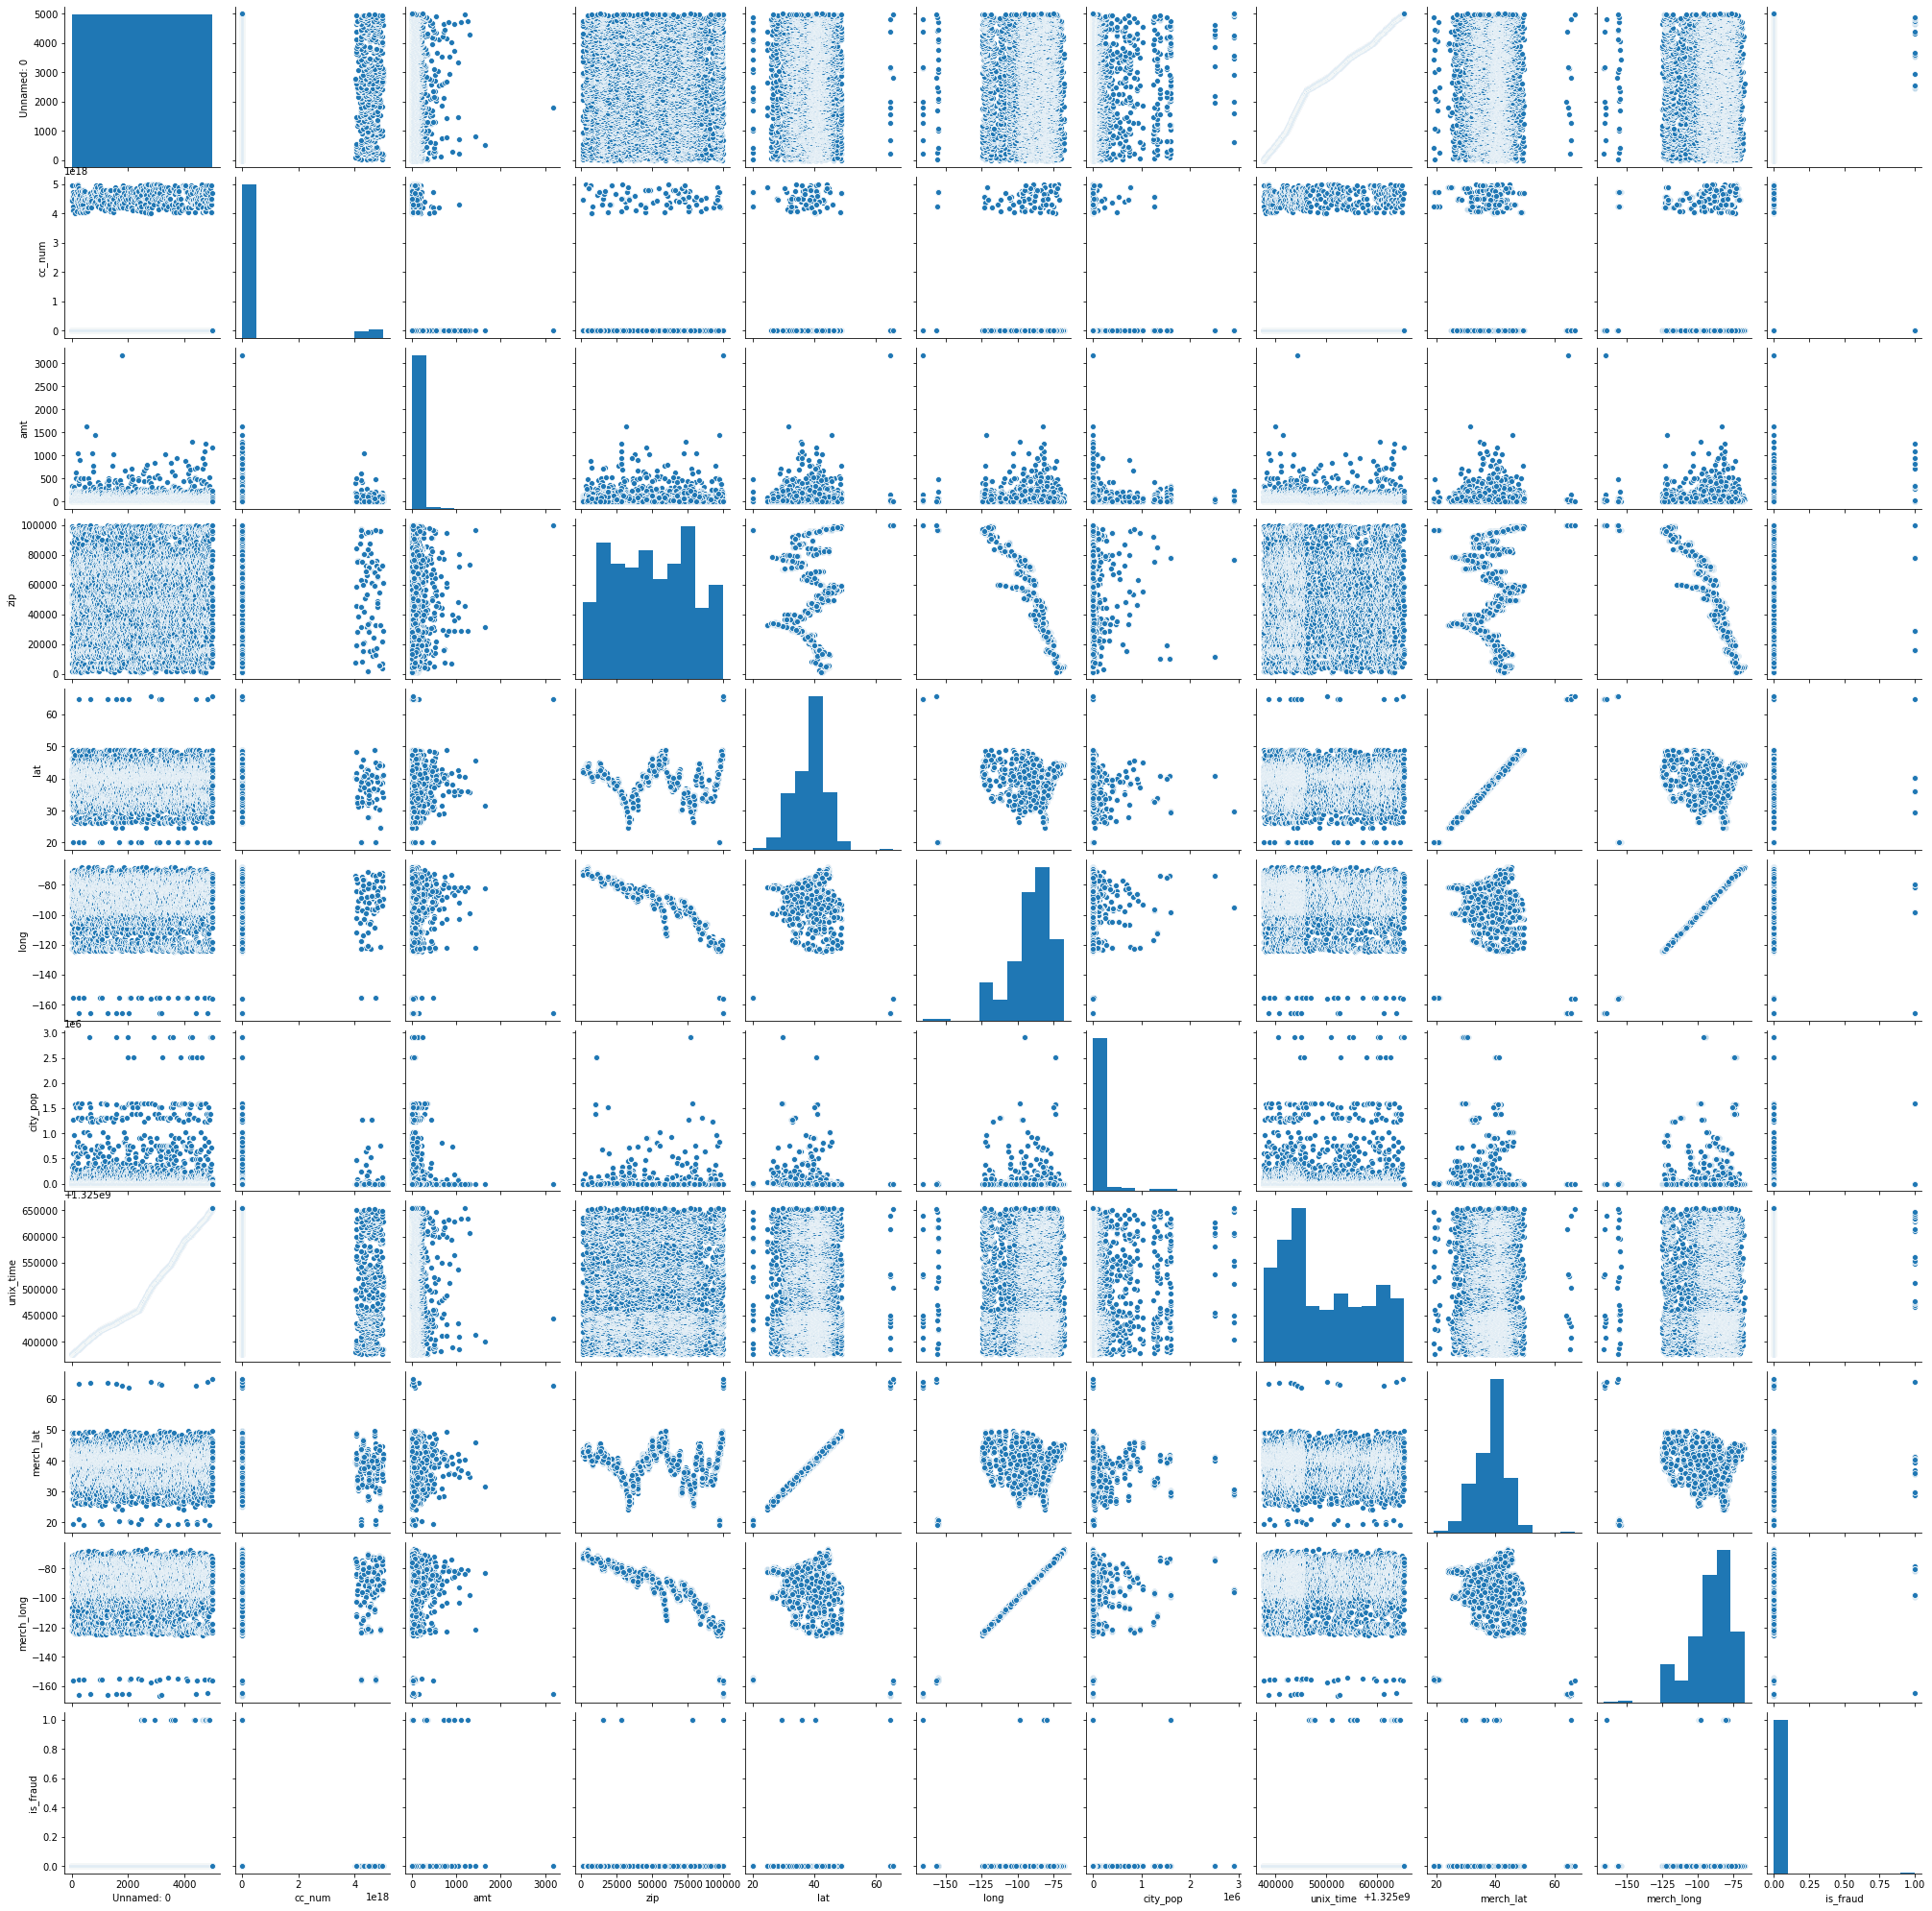

In [15]:
sns.pairplot(data_sample)

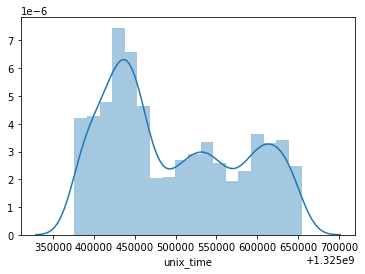

In [21]:
sns.distplot(data_sample['unix_time'])

In [ ]:
# Convert the date of birth into numeric as age
data_train = data_read
data_train['dob']= pd.to_datetime(data_train['dob'])
data_train['dob']

from datetime import datetime
today = datetime.today()
data_train['age'] = round(data_train['dob'].apply(lambda x: (today - x).days//365.25),0)
data_train['age']

In [ ]:
# Display the dataframe column names
data_train.columns

In [ ]:
# Select the columns which are required for the further processing
data_train = data_train[["category", "cc_num", "amt", "lat","long", "job", "age", "trans_num", 
                         "unix_time", "merch_lat","merch_long", "is_fraud"]]
data_train.head()

### One Hot Encoding

In [ ]:
# Encode the transaction number and convert into numeric
from sklearn.preprocessing import LabelEncoder

get_transnum = data_train['trans_num']
label_encoder = LabelEncoder()
label_encoder.fit(get_transnum)
encoded_transnum = label_encoder.transform(get_transnum)
data_train['trans_num'] = encoded_transnum

In [ ]:
# Encode the category and convert into numeric
get_category = data_train['category']
label_encoder = LabelEncoder()
label_encoder.fit(get_category)
encoded_category = label_encoder.transform(get_category)
data_train['category'] = encoded_category

In [ ]:
# Encode the job and convert into numeric
get_job = data_train['job']
label_encoder = LabelEncoder()
label_encoder.fit(get_job)
encoded_job = label_encoder.transform(get_job)
data_train['job'] = encoded_job

In [ ]:
# Define the features
selected_features = data_train.drop('is_fraud', axis=1)

# sets y to is_fraud
target = data_read["is_fraud"].values.reshape(-1, 1)

In [ ]:
selected_features

## Split and Scale the data

In [ ]:
# Import the dependecnies
from sklearn.model_selection import train_test_split

# Split the selected dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, random_state=42)

In [ ]:
# X_train.to_csv("../exporteddata/correlation.csv")

In [ ]:
# Scale the train & test datasets
from sklearn.preprocessing import StandardScaler

# Create a standard scaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the scaled data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Random Forest Classifier

In [ ]:
# Use the Random Forest Classifier Model to get the feature importance/weightage
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

# Fit the random forest model to X and y
rf = rf.fit(X_train_scaled, y_train)

# Return the importance of each column to predicting the outcomes
importances = rf.feature_importances_
importances

In [ ]:
# Sort each column in order of importance
rf_weights = sorted(zip(importances, selected_features.keys()), reverse=True)
rf_weights

In [ ]:
# Convert the weighted feature list into a dataframe
rf_weighted_df = pd.DataFrame(rf_weights)
rf_weighted_df

In [ ]:
# Save the dataframe into a csv file for plotting
rf_weighted_df.to_csv("../exporteddata/random_forest.csv")

In [ ]:
### Plot the random forest features

In [ ]:
colors = ['#c6dbef','#9ecae1','#9ecae1','#9ecae1','#6baed6','#6baed6','#4292c6','#2171b5','#2171b5','#08519c','#08306b','#023858']
sorted_idx = importances.argsort()
# plt.barh(selected_features.columns[sorted_idx], importances[sorted_idx], color=['#FFFFCC',#D9F0A3','#ADDD8E','#78C679','#31A354','#006837'])
plt.barh(selected_features.columns[sorted_idx], importances[sorted_idx], color=colors)

plt.title("Importance of the features on the outcome")
plt.ylabel("Features")
plt.xlabel("Weight")
plt.savefig("../static/images/randomforest.jpg", dpi=300, bbox_inches='tight')
plt.show()

### Plot the histogram for the most weighted feature, Amount

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

data_notfraud = data_train[data_train.is_fraud==0]
data_fraud = data_train[data_train.is_fraud==1]

bins = 50

ax1.hist(data_fraud.amt, bins = bins)
ax1.set_title('Fraud')
# ax1.set_ylabel("Num of Transactions")

ax2.hist(data_notfraud.amt, bins = bins)
ax2.set_title('Not Fraud')
# ax2.set_ylabel('Num of Transactions')

plt.xlabel('Amount ($)', fontsize=11)
f.text(.02, .5, 'Number of transactions', ha='center', va='center', rotation='vertical', fontsize=12)

plt.xlim((0, 20000))
plt.yscale('log')
plt.savefig("../static/images/histogram.jpg", dpi=300, bbox_inches='tight')
plt.show();

### Correlation Diagram

In [ ]:
import seaborn as sns
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.title("Feature correlation diagram")
    plt.xlabel("Features")
    plt.ylabel("Features")
    plt.savefig("../static/images/correlation.jpg", dpi=300, bbox_inches='tight')
    plt.show();

correlation_heatmap(X_train[selected_features.columns[sorted_idx]])


## Logistic Regression

In [ ]:
# Import the dependencies for logistic regression model
from sklearn import set_config
from sklearn.linear_model import LogisticRegression

In [ ]:
# Define logisitic regression model
logistic_regn_model = LogisticRegression()
set_config(print_changed_only=False)
print(logistic_regn_model)

In [ ]:
# Train the data with the logisitic regression model
logistic_regn_model.fit(X_train_scaled, y_train)

In [ ]:
# Print the training score for training and testing datasets
print(f"Training Data Score: {logistic_regn_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logistic_regn_model.score(X_test_scaled, y_test)}")

In [ ]:
# Make predictions with the test data
lr_predictions = logistic_regn_model.predict(X_test_scaled)
print(f"First 10 Predictions:   {lr_predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")
print( np.unique(lr_predictions) )

### Gradient Boosting Regressor model

In [ ]:
# fitting Gradient Boosting Regressor model to see accuracy
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

gradient = GradientBoostingRegressor(alpha=.01).fit(X_train_scaled, y_train)
predictions = gradient.predict(X_test_scaled)

MSE = mean_squared_error(y_test, predictions)
r2 = gradient.score(X_test_scaled, y_test)
print(f"MSE: {MSE}, R2: {r2}")

print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [ ]:
print(predictions)

### XGBoost Model

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(n_estimators=20)
xgb.fit(X_train_scaled, y_train)
xgb.feature_importances_

In [ ]:
xgb_weights = sorted(zip(xgb.feature_importances_, selected_features.keys()), reverse=True)

In [ ]:
xgb_df = pd.DataFrame(xgb_weights)
xgb_df.to_csv("../exporteddata/xgboost_features.csv")

In [ ]:
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(selected_features.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.title("XGBoost feature importance")
plt.xlabel("Feature weight", fontsize=11)
plt.ylabel("Features", fontsize=11)
plt.savefig("../static/images/xgb_features.jpg", dpi=300, bbox_inches='tight')
plt.show

### Gaussian Naïve Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB 
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)
gnb_prediction = gnb_model.predict(X_test_scaled)

In [ ]:
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, gnb_prediction)*100)

In [ ]:
print(f"First 10 Predictions:   {gnb_prediction[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# Confusion Matrix for Gaussian Naive Bayes Model
metrics.confusion_matrix(gnb_prediction, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, gnb_prediction).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

In [ ]:
# Confusion Matrix for Logistic Regression Model
lr_predicted = logistic_regn_model.predict(X_test_scaled)
cf_matrix = metrics.confusion_matrix(lr_predicted, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, lr_predicted).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

In [ ]:
import seaborn as sns

In [ ]:
# Plot the confusion matrix chart
class_names =["0","1"]
plot_confusion_matrix(logistic_regn_model, X_test_scaled, y_test,
                                 display_labels=class_names,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression Model")
plt.savefig("../static/images/cmatrix_logreg.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

# group_percentages = ["{0:.2%}".format(value) for value in
#                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]


labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels,  fmt='', cmap='Blues')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
class_names =["0","1"]
# plt.figure()
plot_confusion_matrix(gnb_model, X_test_scaled, y_test,
                                 display_labels=class_names,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Gaussian Naïve Bayes Model")
plt.savefig("../static/images/cmatrix_gnb.jpg", dpi=300, bbox_inches='tight')
plt.show()

## Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#Classification Report for Gaussian Naïve Bayes 
print(classification_report(y_test, gnb_prediction,
                           target_names=['Genuine','Fraud']))

In [ ]:
#Classification Report for logisitc Regression Model
print(classification_report(y_test, lr_predictions,
                           target_names=['Genuine','Fraud']))

In [ ]:
# save the best trained model- Logistic Regression Model for the flask app
import joblib
filename = 'logistic_regn_model.sav'
joblib.dump(logistic_regn_model, filename)


In [ ]:
# save the best trained model- Logistic Regression Model for the flask app
import joblib
filename = 'gnb_model.sav'
joblib.dump(gnb_model, filename)